In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/processed/ebi_base_eda.csv',index_col=0,)
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
3,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
4,645.0,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
8995,800.0,France,Female,29,2,0.00,2,0,0,167773.55,0
8996,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0
8997,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1
8998,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
customer_churn_rate = (len(df[df['churn'] == 1]) / len(df)) * 100
customer_churn_rate

20.355555555555554

In [4]:
df_female = df[df['gender'] == 'Female']

female_churn_rate = round(((len(df_female[df_female['churn'] == 1]) / len(df_female)) * 100), 2)


df_male = df[df['gender'] == 'Male']
male_churn_rate = round((len(df_male[df_male['churn'] == 1]) / len(df_male)) * 100,2)

In [5]:
print(f'Male Churn Rate is {male_churn_rate}')
print(f'Female Churn Rate is {female_churn_rate}')

Male Churn Rate is 16.49
Female Churn Rate is 24.98


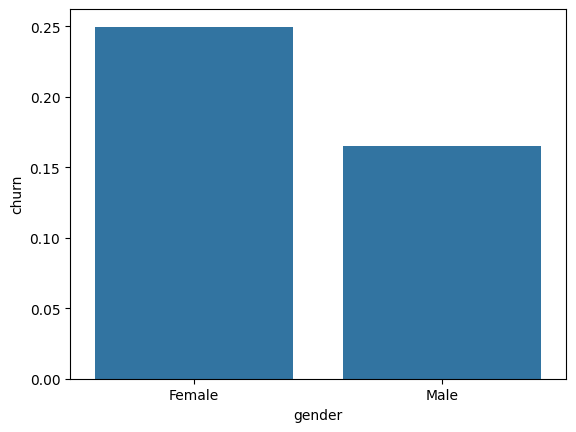

In [6]:
sns.barplot(data=df, x='gender', y='churn',errorbar=None)
plt.show()

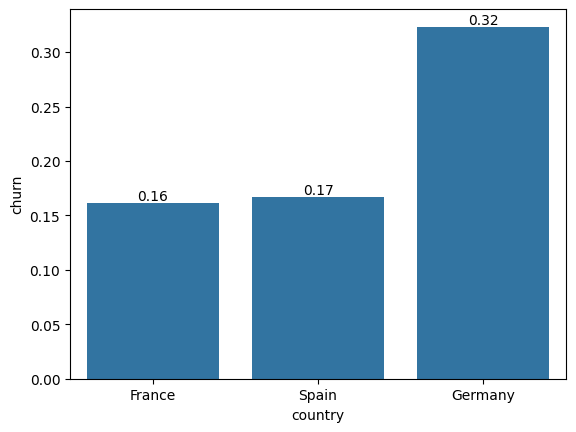

In [7]:
ax = sns.barplot(data=df, x='country', y='churn', estimator='mean', errorbar=None)

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f', label_type='edge')
plt.show()

In [8]:
df['age'].value_counts(bins=7)

(28.571, 39.143]                4223
(39.143, 49.714]                2366
(17.924999999999997, 28.571]    1158
(49.714, 60.286]                 837
(60.286, 70.857]                 299
(70.857, 81.429]                 109
(81.429, 92.0]                     8
Name: count, dtype: int64

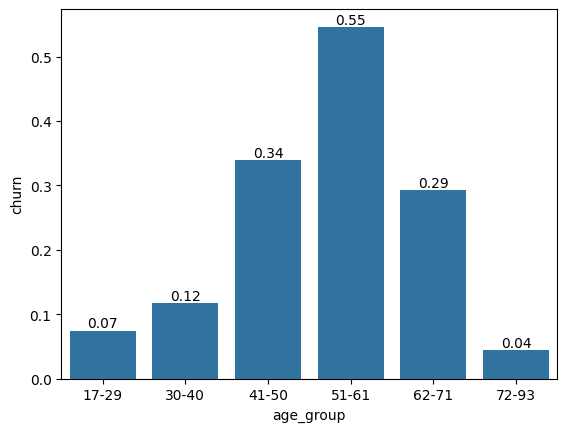

In [9]:
bins= [17, 29, 40, 50, 61, 71, 93 ]
labels= ['17-29', '30-40', '41-50', '51-61','62-71', '72-93']
df['age_group'] = pd.cut(df['age'], bins= bins, labels=labels, right=True)
ax = sns.barplot(data=df, x='age_group', y='churn', errorbar=None)

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f', label_type='edge')
plt.show()

In [10]:
df['credit_score'].value_counts(bins= 7).sort_index()

(384.033, 451.0]     173
(451.0, 517.5]       650
(517.5, 584.0]      1446
(584.0, 650.5]      2185
(650.5, 717.0]      2305
(717.0, 783.5]      1432
(783.5, 850.0]       809
Name: count, dtype: int64

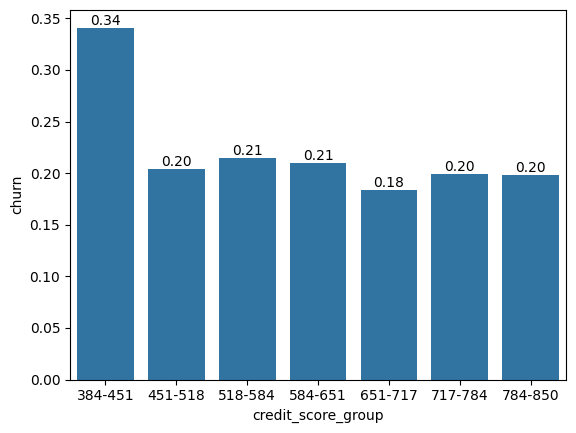

In [11]:
bins=[384, 451, 518, 584, 651, 717, 784, 850]
labels = ['384-451', '451-518', '518-584', '584-651','651-717', '717-784','784-850']

df['credit_score_group'] = pd.cut(df['credit_score'], bins=bins, labels=labels, right=True)

ax = sns.barplot(data=df, x='credit_score_group', y='churn', errorbar=None)

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f', label_type='edge')

plt.show()



In [12]:
df['balance'].value_counts(bins=5).sort_index()

(-250.899, 50179.618]       3306
(50179.618, 100359.236]     1392
(100359.236, 150538.854]    3439
(150538.854, 200718.472]     834
(200718.472, 250898.09]       29
Name: count, dtype: int64

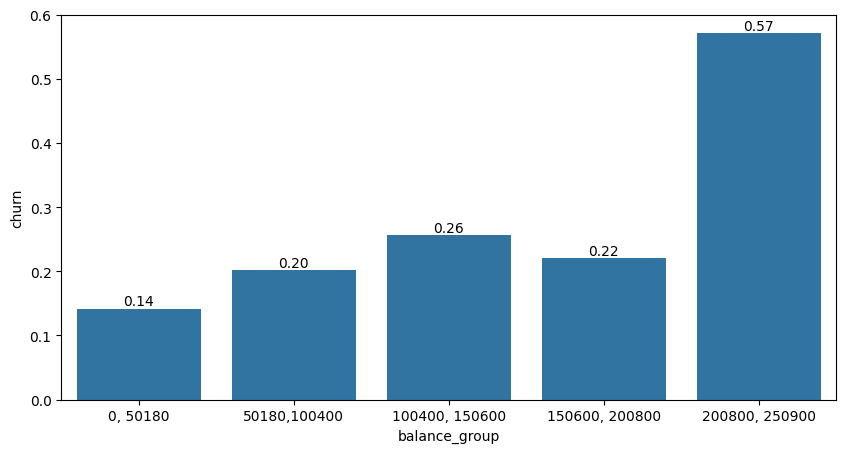

In [13]:
bins=[-1, 50180, 100400, 150600, 200800, 250900 ]
labels = ['0, 50180', '50180,100400','100400, 150600','150600, 200800', '200800, 250900']

df['balance_group'] = pd.cut(df['balance'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(data=df, x='balance_group', y='churn', errorbar=None)

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f', label_type='edge')


plt.show()

In [14]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_group,credit_score_group,balance_group
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50,584-651,"0, 50180"
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50,584-651,"50180,100400"
2,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0,30-40,651-717,"0, 50180"
3,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-50,784-850,"100400, 150600"
4,645.0,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,41-50,584-651,"100400, 150600"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,800.0,France,Female,29,2,0.00,2,0,0,167773.55,0,17-29,784-850,"0, 50180"
8996,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0,30-40,451-518,"50180,100400"
8997,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1,30-40,651-717,"0, 50180"
8998,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-50,717-784,"50180,100400"


In [15]:
df['estimated_salary'].value_counts(bins=6).sort_index()

(-188.40200000000002, 33341.73]    1449
(33341.73, 66671.88]               1503
(66671.88, 100002.03]              1529
(100002.03, 133332.18]             1520
(133332.18, 166662.33]             1460
(166662.33, 199992.48]             1539
Name: count, dtype: int64

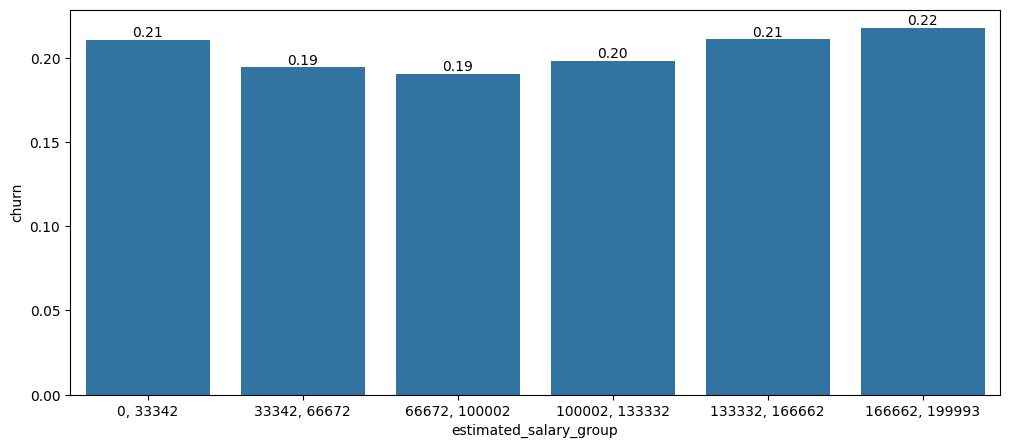

In [16]:
bins=[0, 33342, 66672, 100002, 133332, 166662, 199993]
labels = ['0, 33342', '33342, 66672', '66672, 100002', '100002, 133332', '133332, 166662', '166662, 199993']

df['estimated_salary_group']= pd.cut(df['estimated_salary'], bins=bins, labels=labels, right=True)
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df, x='estimated_salary_group', y='churn', errorbar=None)

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f', label_type='edge')

plt.show()

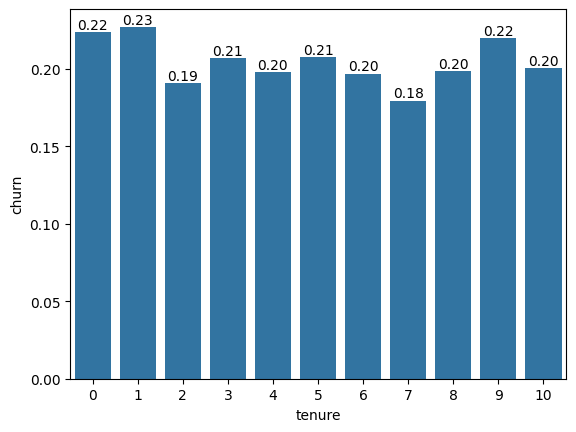

In [17]:
ax = sns.barplot(data=df, x='tenure', y='churn', estimator='mean', errorbar=None)

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f', label_type='edge')


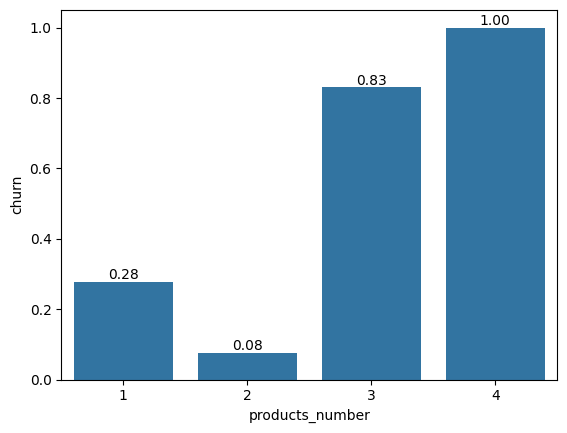

In [18]:
ax = sns.barplot(data=df, x='products_number', y='churn', estimator='mean', errorbar=None)

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f', label_type='edge')

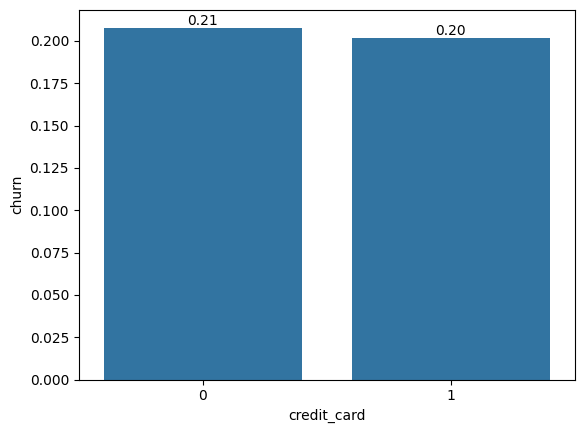

In [19]:
ax = sns.barplot(data=df, x='credit_card', y='churn', estimator='mean', errorbar=None)

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f', label_type='edge')

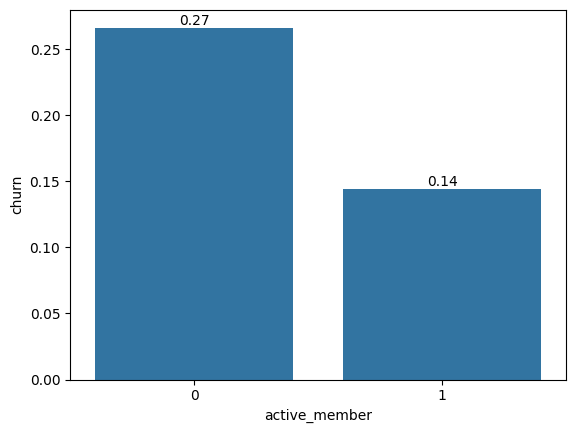

In [20]:
ax = sns.barplot(data=df, x='active_member', y='churn', estimator='mean', errorbar=None)

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.2f', label_type='edge')

In [21]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_group,credit_score_group,balance_group,estimated_salary_group
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50,584-651,"0, 50180","100002, 133332"
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50,584-651,"50180,100400","100002, 133332"
2,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0,30-40,651-717,"0, 50180","66672, 100002"
3,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-50,784-850,"100400, 150600","66672, 100002"
4,645.0,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,41-50,584-651,"100400, 150600","133332, 166662"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,800.0,France,Female,29,2,0.00,2,0,0,167773.55,0,17-29,784-850,"0, 50180","166662, 199993"
8996,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0,30-40,451-518,"50180,100400","100002, 133332"
8997,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1,30-40,651-717,"0, 50180","33342, 66672"
8998,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-50,717-784,"50180,100400","66672, 100002"


In [24]:
df.isnull().sum()

credit_score              0
country                   0
gender                    0
age                       0
tenure                    0
balance                   0
products_number           0
credit_card               0
active_member             0
estimated_salary          0
churn                     0
age_group                 0
credit_score_group        0
balance_group             0
estimated_salary_group    0
dtype: int64

In [30]:
corr_target = df.corr(numeric_only=True)['churn'].sort_values(ascending=False)
print(corr_target)

churn               1.000000
age                 0.283851
balance             0.119345
estimated_salary    0.013179
credit_card        -0.006995
tenure             -0.010050
credit_score       -0.029545
products_number    -0.049373
active_member      -0.151216
Name: churn, dtype: float64


In [31]:
corr = df['tenure'].corr(df['churn'])
corr

np.float64(-0.01005024255865535)

In [32]:
map_gender = {
    'Male': 1,
    'Female': 0
}

df['gender'] = df['gender'].map(map_gender)
df = pd.get_dummies(df, columns=['country'], drop_first=True, dtype=int )
df

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_group,credit_score_group,balance_group,estimated_salary_group,country_Germany,country_Spain
0,619.0,0,42,2,0.00,1,1,1,101348.88,1,41-50,584-651,"0, 50180","100002, 133332",0,0
1,608.0,0,41,1,83807.86,1,0,1,112542.58,0,41-50,584-651,"50180,100400","100002, 133332",0,1
2,699.0,0,39,1,0.00,2,0,0,93826.63,0,30-40,651-717,"0, 50180","66672, 100002",0,0
3,850.0,0,43,2,125510.82,1,1,1,79084.10,0,41-50,784-850,"100400, 150600","66672, 100002",0,1
4,645.0,1,44,8,113755.78,2,1,0,149756.71,1,41-50,584-651,"100400, 150600","133332, 166662",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,800.0,0,29,2,0.00,2,0,0,167773.55,0,17-29,784-850,"0, 50180","166662, 199993",0,0
8996,516.0,1,35,10,57369.61,1,1,1,101699.77,0,30-40,451-518,"50180,100400","100002, 133332",0,0
8997,709.0,0,36,7,0.00,1,0,1,42085.58,1,30-40,651-717,"0, 50180","33342, 66672",0,0
8998,772.0,1,42,3,75075.31,2,1,0,92888.52,1,41-50,717-784,"50180,100400","66672, 100002",1,0


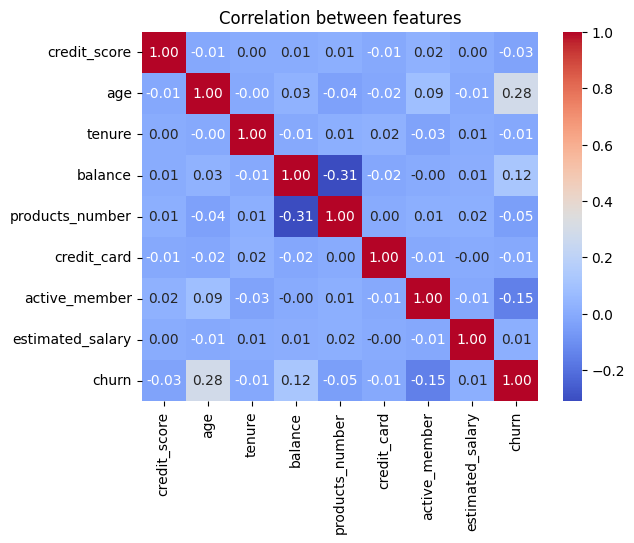

In [ ]:
df_2 = pd.read_csv('../data/processed/ebi_base_eda.csv',index_col=0,)
corr = df_2.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between features')
plt.show()